In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns

Считаем данные о курсе валют(Доллар США, Канадский доллар, Евро) с 01.10.2020 по 19.10.2024

In [100]:
USA_df = pd.read_excel("доллар_США.xlsx", sheet_name = "RC")
USA_df = USA_df.drop(columns=["nominal", "cdx"]).rename(columns={"curs" : "USA"})
USA_df

C:\Users\nev1L\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,data,USA
0,2024-10-19,96.4172
1,2024-10-18,97.1490
2,2024-10-17,97.2568
3,2024-10-16,97.0121
4,2024-10-15,96.1021
...,...,...
999,2020-10-07,78.5119
1000,2020-10-06,78.1281
1001,2020-10-03,78.0915
1002,2020-10-02,77.2774


In [101]:
CN_df = pd.read_excel("канадский_доллар.xlsx", sheet_name = "RC")
CN_df = CN_df.drop(columns=["nominal", "cdx"]).rename(columns={"curs" : "CND"})
CN_df

C:\Users\nev1L\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,data,CND
0,2024-10-19,69.9233
1,2024-10-18,70.5461
2,2024-10-17,70.4504
3,2024-10-16,70.4979
4,2024-10-15,69.8366
...,...,...
999,2020-10-07,59.1917
1000,2020-10-06,58.8669
1001,2020-10-03,58.7242
1002,2020-10-02,58.1208


In [102]:
EURO_df = pd.read_excel("евро.xlsx", sheet_name = "RC")
EURO_df = EURO_df.drop(columns=["nominal", "cdx"]).rename(columns={"curs" : "EUR"})
EURO_df

C:\Users\nev1L\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,data,EUR
0,2024-10-19,104.8565
1,2024-10-18,105.7560
2,2024-10-17,106.0844
3,2024-10-16,105.6757
4,2024-10-15,105.4854
...,...,...
999,2020-10-07,92.5184
1000,2020-10-06,91.6599
1001,2020-10-03,91.5779
1002,2020-10-02,90.7237


In [103]:
currency_df = USA_df.merge(CN_df,how="inner", on="data").merge(EURO_df,how="inner", on="data")
currency_df = currency_df.rename(columns={"data" : "date"})
currency_df

,date,USA,CND,EUR
0,2024-10-19,96.4172,69.9233,104.8565
1,2024-10-18,97.1490,70.5461,105.7560
2,2024-10-17,97.2568,70.4504,106.0844
3,2024-10-16,97.0121,70.4979,105.6757
4,2024-10-15,96.1021,69.8366,105.4854
...,...,...,...,...
999,2020-10-07,78.5119,59.1917,92.5184
1000,2020-10-06,78.1281,58.8669,91.6599
1001,2020-10-03,78.0915,58.7242,91.5779
1002,2020-10-02,77.2774,58.1208,90.7237


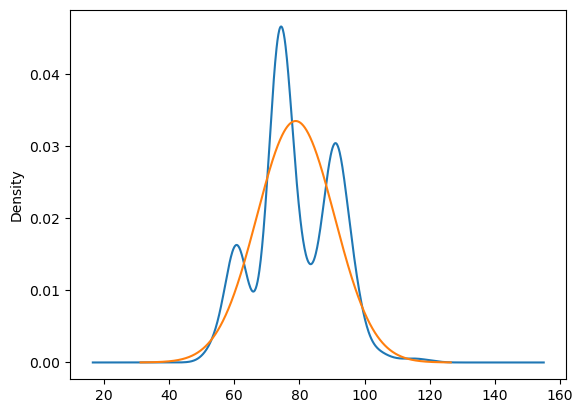

In [104]:
currency_df["USA"].plot(kind="kde")

vals = np.linspace(currency_df["USA"].mean() -4*currency_df["USA"].std(),\
                    currency_df["USA"].mean() + 4*currency_df["USA"].std(), \
                    1000,)


plt.plot(vals, norm.pdf(vals, currency_df["USA"].mean(), currency_df["USA"].std()))

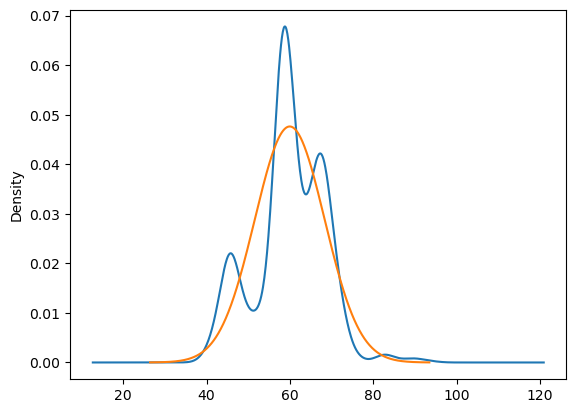

In [105]:
currency_df["CND"].plot(kind="kde")

vals = np.linspace(currency_df["CND"].mean() -4*currency_df["CND"].std(),\
                    currency_df["CND"].mean() + 4*currency_df["CND"].std(), \
                    1000,)


plt.plot(vals, norm.pdf(vals, currency_df["CND"].mean(), currency_df["CND"].std()))

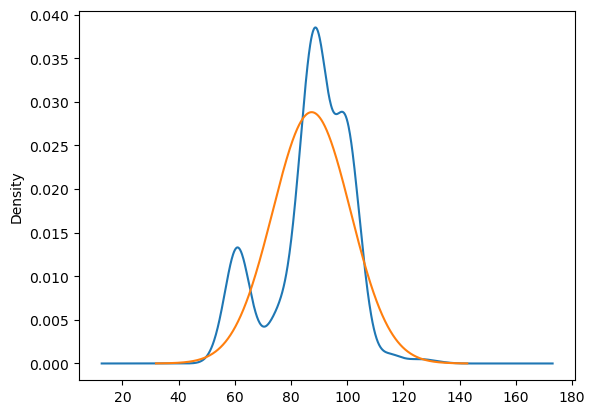

In [106]:
currency_df["EUR"].plot(kind="kde")

vals = np.linspace(currency_df["EUR"].mean() -4*currency_df["EUR"].std(),\
                    currency_df["EUR"].mean() + 4*currency_df["EUR"].std(), \
                    1000,)


plt.plot(vals, norm.pdf(vals, currency_df["EUR"].mean(), currency_df["EUR"].std()))

In [107]:
scaler = MinMaxScaler()
norm_currency = pd.DataFrame(scaler.fit_transform(currency_df[["USA", "CND", "EUR"]]),\
                             index=currency_df["date"], \
                             columns=["USA", "CND", "EUR"])
norm_currency

,USA,CND,EUR
date,,,
2024-10-19,0.653841,0.557530,0.649694
2024-10-18,0.664413,0.569045,0.660907
2024-10-17,0.665970,0.567275,0.665001
2024-10-16,0.662435,0.568153,0.659906
2024-10-15,0.649289,0.555927,0.657534
...,...,...,...
2020-10-07,0.395171,0.359115,0.495891
2020-10-06,0.389626,0.353110,0.485190
2020-10-03,0.389097,0.350472,0.484167


In [108]:
scaler = StandardScaler()
stand_currency = pd.DataFrame(scaler.fit_transform(currency_df[["USA", "CND", "EUR"]]),\
                             index=currency_df["date"], \
                             columns=["USA", "CND", "EUR"])
stand_currency

,USA,CND,EUR
date,,,
2024-10-19,1.478433,1.190406,1.266841
2024-10-18,1.539944,1.264811,1.331844
2024-10-17,1.549005,1.253377,1.355577
2024-10-16,1.528437,1.259052,1.326041
2024-10-15,1.451948,1.180048,1.312289
...,...,...,...
2020-10-07,-0.026576,-0.091673,0.375209
2020-10-06,-0.058836,-0.130476,0.313168
2020-10-03,-0.061912,-0.147524,0.307242


Построим P-Pplot и Q-Qplot для USD

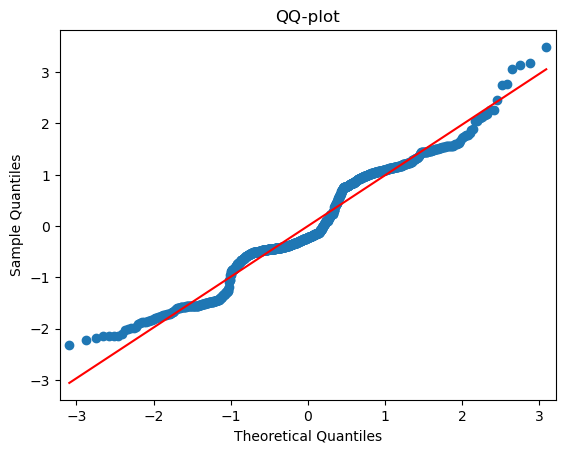

In [109]:
proplot = sm.ProbPlot(stand_currency["USA"])
proplot.qqplot(line="r")
plt.title("QQ-plot")
plt.show()

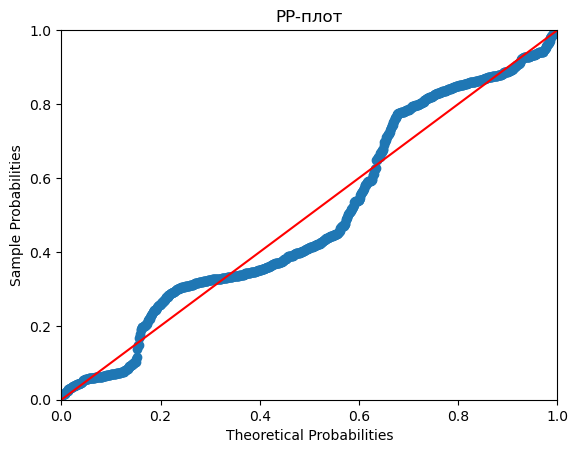

In [110]:
sm.ProbPlot(stand_currency["USA"]).ppplot(line='45')
plt.title('PP-плот')
plt.show()

Построим P-Pplot и Q-Qplot для CND

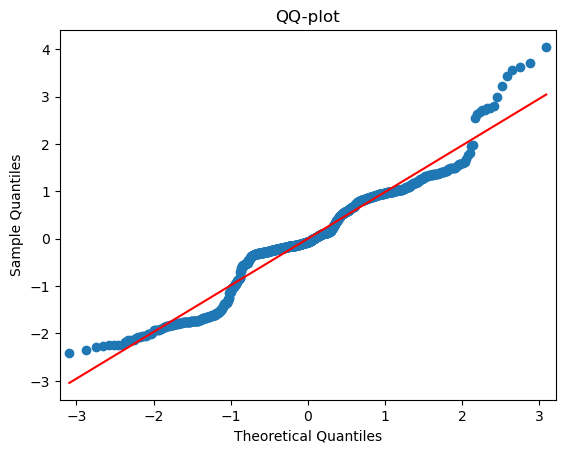

In [111]:
proplot = sm.ProbPlot(stand_currency["CND"])
proplot.qqplot(line="r")
plt.title("QQ-plot")
plt.show()

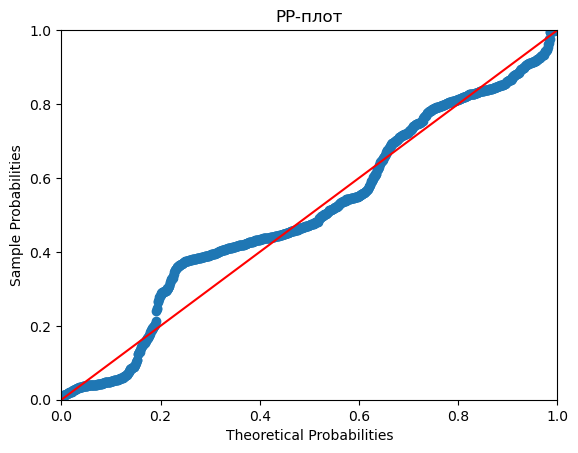

In [112]:
sm.ProbPlot(stand_currency["CND"]).ppplot(line='45')
plt.title('PP-плот')
plt.show()

Построим P-Pplot и Q-Qplot для EUR

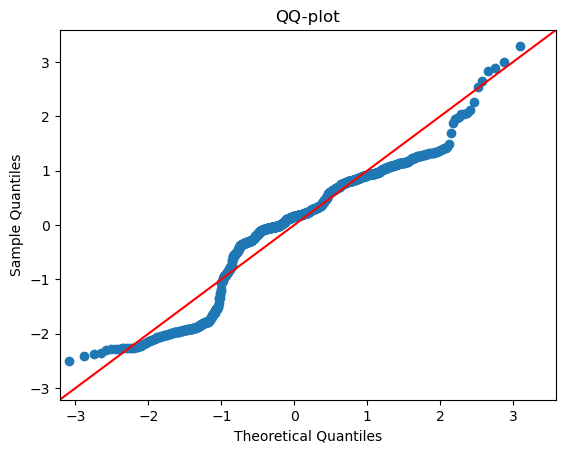

In [113]:
proplot = sm.ProbPlot(stand_currency["EUR"])
proplot.qqplot(line="45")
plt.title("QQ-plot")
plt.show()

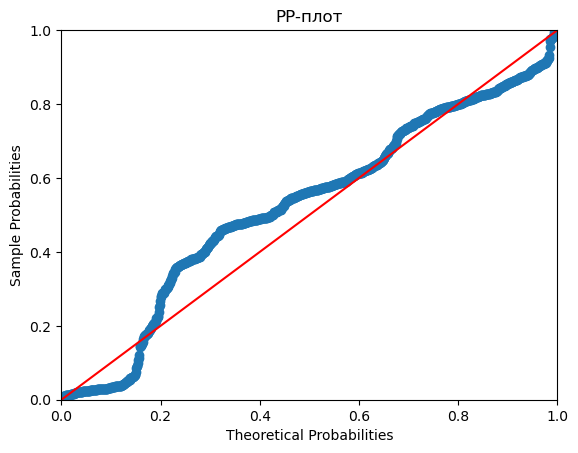

In [114]:
sm.ProbPlot(stand_currency["EUR"]).ppplot(line='45')
plt.title('PP-плот')
plt.show()

Построим гистограмму распределения а также изобразим моду, ср. знач и медиану 

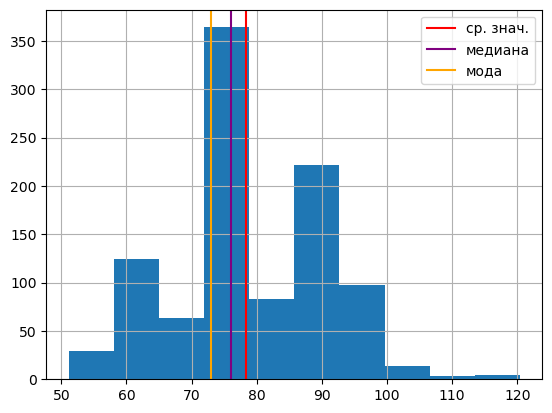

In [115]:
currency_df["USA"].hist()


ser = currency_df["USA"].apply(int) # округлили до целого, чтобы знач 95.55 и 95.6 счилатись за одно знач, 
                                    #будет очень много значений и м.б. такое что каждое значение встречается по одному разу  
                                    # и тогда мод будет столько же сколько и наблюдений
plt.axvline(x=ser.mean(), color="r", label="ср. знач.")
plt.axvline(x=ser.median(), color="purple", label="медиана")
for m in ser.mode():
    plt.axvline(x=m, color="orange", label="мода")

plt.legend()
plt.show()

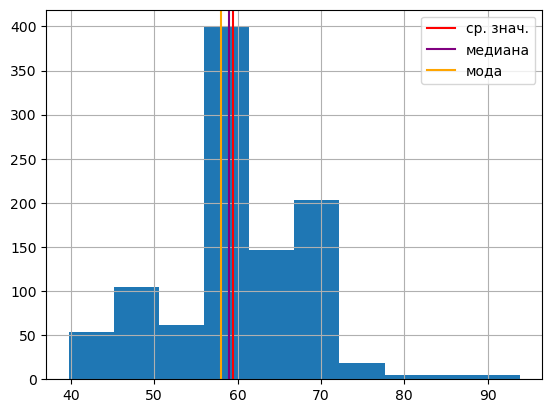

In [116]:
currency_df["CND"].hist()


ser = currency_df["CND"].apply(int)

plt.axvline(x=ser.mean(), color="r", label="ср. знач.")
plt.axvline(x=ser.median(), color="purple", label="медиана")
for m in ser.mode():
    plt.axvline(x=m, color="orange", label="мода")

plt.legend()
plt.show()

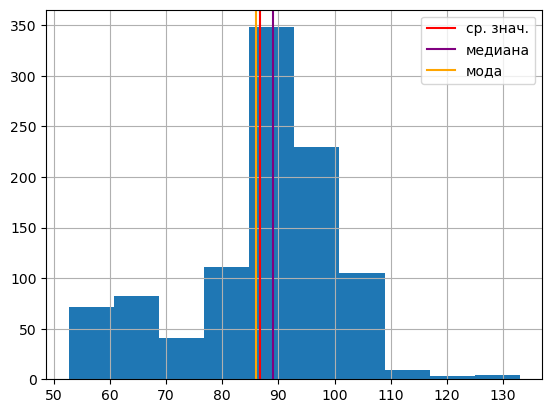

In [117]:
currency_df["EUR"].hist()


ser = currency_df["EUR"].apply(int)

plt.axvline(x=ser.mean(), color="r", label="ср. знач.")
plt.axvline(x=ser.median(), color="purple", label="медиана")
for m in ser.mode():
    plt.axvline(x=m, color="orange", label="мода")

plt.legend()
plt.show()

Проверим на нормальность распределения выборки с помощью кртерия Шапиро-Уилка, т.к. выборки < 2000

In [118]:
w = stats.shapiro(currency_df["USA"])
w

ShapiroResult(statistic=0.9652637243270874, pvalue=9.698143540136633e-15)

p-val < 0.05 => Распределение USD отличается от нормального

In [119]:
w = stats.shapiro(currency_df["CND"])
w

ShapiroResult(statistic=0.9584692716598511, pvalue=2.815469489339718e-16)

p-val < 0.05 => Распределение CND отличается от нормального

In [120]:
w = stats.shapiro(currency_df["EUR"])
w

ShapiroResult(statistic=0.927979052066803, pvalue=1.5309633866387072e-21)

p-val < 0.05 => Распределение EUR отличается от нормального

Расчитаем коэфициенты корреляции для USD и CND 

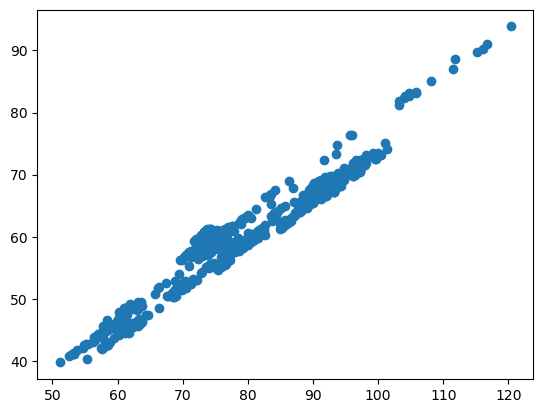

In [126]:
plt.scatter(currency_df["USA"], currency_df["CND"])
plt.show()

In [127]:
stats.pearsonr(currency_df["USA"], currency_df["CND"])

PearsonRResult(statistic=0.9702955316786608, pvalue=0.0)

In [130]:
stats.spearmanr(currency_df["USA"], currency_df["CND"])

SignificanceResult(statistic=0.9498867013147002, pvalue=0.0)

In [131]:
stats.kendalltau(currency_df["USA"], currency_df["CND"])

SignificanceResult(statistic=0.828120531318167, pvalue=0.0)

Расчитаем коэфициенты корреляции для USD и EUR

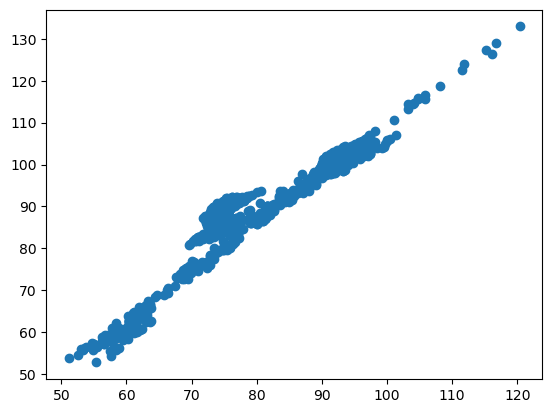

In [128]:
plt.scatter(currency_df["USA"], currency_df["EUR"])

In [86]:
stats.pearsonr(currency_df["USA"], currency_df["EUR"])

PearsonRResult(statistic=0.9479652105010723, pvalue=0.0)

In [132]:
stats.spearmanr(currency_df["USA"], currency_df["EUR"])

SignificanceResult(statistic=0.9434913215916756, pvalue=0.0)

In [133]:
stats.kendalltau(currency_df["USA"], currency_df["EUR"])

SignificanceResult(statistic=0.8207470255920838, pvalue=0.0)

Расчитаем коэфициенты корреляции для EUR и CND

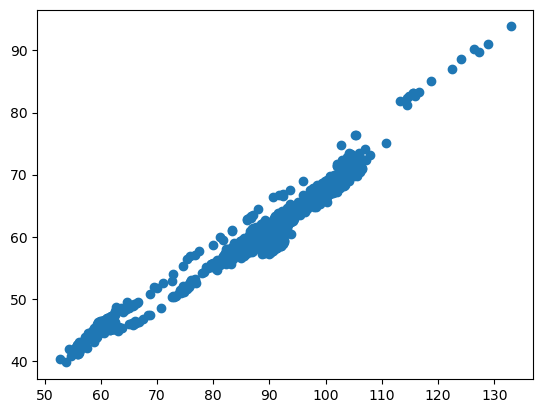

In [129]:
plt.scatter(currency_df["EUR"], currency_df["CND"])

In [135]:
stats.pearsonr(currency_df["EUR"], currency_df["CND"])

PearsonRResult(statistic=0.9753341298064951, pvalue=0.0)

In [137]:
stats.spearmanr(currency_df["EUR"], currency_df["CND"])

SignificanceResult(statistic=0.9575462020688206, pvalue=0.0)

In [138]:
stats.kendalltau(currency_df["EUR"], currency_df["CND"])

SignificanceResult(statistic=0.8441731901109316, pvalue=0.0)

Коэф. кор. Пирсона больше подходит для этих данных, т.к. они линейно-зависимы и отсутсвуют явные выбросы

Посмотрим на корреляционную матрицу

<Axes: >

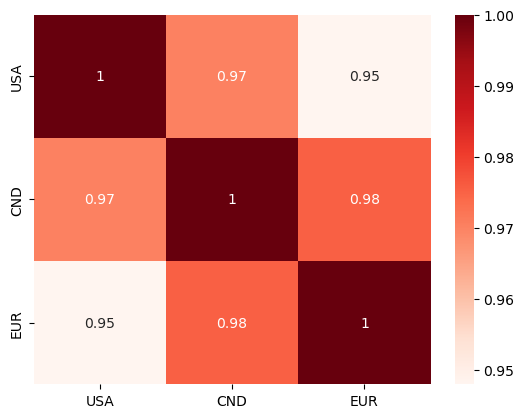

In [143]:
cdf = currency_df[["USA","CND","EUR"]].corr()
sns.heatmap(cdf, annot=True, cmap="Reds")